In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cm as cm
from statsmodels.stats.weightstats import ztest

## Exploratory Data Analysis

In [2]:
crashes = pd.read_csv('Maryland_Statewide_Vehicle_Crashes.csv',low_memory=False)
vehicles = pd.read_csv('Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv',low_memory=False)
persons = pd.read_csv('Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_.csv',low_memory=False)

In [3]:
crashes.shape

(848804, 56)

In [4]:
persons.shape

(1903316, 48)

In [5]:
vehicles.shape

(1583279, 49)

In [6]:
crashes.columns

Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC',
       'COUNTY_NO', 'MUNI_DESC', 'MUNI_CODE', 'JUNCTION_DESC', 'JUNCTION_CODE',
       'COLLISION_TYPE_DESC', 'COLLISION_TYPE_CODE', 'SURF_COND_DESC',
       'SURF_COND_CODE', 'LANE_CODE', 'RD_COND_DESC', 'RD_COND_CODE',
       'RD_DIV_DESC', 'RD_DIV_CODE', 'FIX_OBJ_DESC', 'FIX_OBJ_CODE',
       'REPORT_NO', 'REPORT_TYPE', 'WEATHER_DESC', 'WEATHER_CODE', 'ACC_DATE',
       'ACC_TIME', 'LOC_CODE', 'SIGNAL_FLAG_DESC', 'SIGNAL_FLAG',
       'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE', 'HARM_EVENT_DESC1',
       'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2', 'HARM_EVENT_CODE2', 'RTE_NO',
       'ROUTE_TYPE_CODE', 'RTE_SUFFIX', 'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC',
       'LOGMILE_DIR_FLAG', 'MAINROAD_NAME', 'DISTANCE', 'FEET_MILES_FLAG_DESC',
       'FEET_MILES_FLAG', 'DISTANCE_DIR_FLAG', 'REFERENCE_NO',
       'REFERENCE_TYPE_CODE', 'REFERENCE_SUFFIX', 'REFERENCE_ROAD_NAME',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'Counties'

In [7]:
vehicles.columns

Index(['HARM_EVENT_DESC', 'HARM_EVENT_CODE', 'CONTI_DIRECTION_DESC',
       'CONTI_DIRECTION_CODE', 'DAMAGE_DESC', 'DAMAGE_CODE', 'MOVEMENT_DESC',
       'MOVEMENT_CODE', 'VIN_NO', 'REPORT_NO', 'CV_BODY_TYPE_DESC',
       'CV_BODY_TYPE_CODE', 'VEH_YEAR', 'VEH_MAKE', 'VEH_MODEL',
       'COMMERCIAL_FLAG_DESC', 'COMMERCIAL_FLAG', 'HZM_NUM',
       'TOWED_AWAY_FLAG_DESC', 'TOWED_AWAY_FLAG', 'NUM_AXLES', 'GVW_DESC',
       'GVW_CODE', 'GOING_DIRECTION_DESC', 'GOING_DIRECTION_CODE',
       'BODY_TYPE_DESC', 'BODY_TYPE_CODE', 'DRIVERLESS_FLAG_DESC',
       'DRIVERLESS_FLAG', 'FIRE_FLAG_DESC', 'FIRE_FLAG', 'PARKED_FLAG_DESC',
       'PARKED_FLAG', 'SPEED_LIMIT', 'HIT_AND_RUN_FLAG_DESC',
       'HIT_AND_RUN_FLAG', 'HAZMAT_SPILL_FLAG_DESC', 'HAZMAT_SPILL_FLAG',
       'VEHICLE_ID', 'TOWED_VEHICLE_CONFIG_DESC', 'TOWED_VEHICLE_CONFIG_CODE',
       'AREA_DAMAGED_CODE_IMP1', 'AREA_DAMAGED_CODE1', 'AREA_DAMAGED_CODE2',
       'AREA_DAMAGED_CODE3', 'AREA_DAMAGED_CODE_MAIN_DESC',
       'AREA_DAMAGED_

In [8]:
persons.columns

Index(['SEX_DESC', 'SEX_CODE', 'CONDITION_DESC', 'CONDITION_CODE',
       'INJ_SEVER_DESC', 'INJ_SEVER_CODE', 'REPORT_NO', 'OCC_SEAT_POS_DESC',
       'OCC_SEAT_POS_CODE', 'PED_VISIBLE_DESC', 'PED_VISIBLE_CODE',
       'PED_OBEY_DESC', 'PED_OBEY_CODE', 'PED_TYPE_DESC', 'PED_TYPE_CODE',
       'PED_LOCATION_CODE', 'MOVEMENT_DESC', 'MOVEMENT_CODE',
       'PERSON_TYPE_DESC', 'PERSON_TYPE', 'ALCOHOL_TEST_DESC',
       'ALCOHOL_TEST_CODE', 'ALCOHOL_TESTTYPE_DESC', 'ALCOHOL_TESTTYPE_CODE',
       'DRUG_TEST_DESC', 'DRUG_TEST_CODE', 'DRUG_TESTRESULT_DESC',
       'DRUG_TESTRESULT_CODE', 'BAC_CODE', 'FAULT_FLAG_DESC', 'FAULT_FLAG',
       'EQUIP_PROB_DESC', 'EQUIP_PROB_CODE', 'SAF_EQUIP_DESC',
       'SAF_EQUIP_CODE', 'EJECT_DESC', 'EJECT_CODE', 'DATE_OF_BIRTH',
       'PERSON_ID', 'LICENSE_STATE_CODE', 'CLASS', 'CDL_FLAG_DESC', 'CDL_FLAG',
       'VEHICLE_ID', 'EMS_UNIT_LABEL', 'AIRBAG_DEPLOYED', 'YEAR', 'Quarter'],
      dtype='object')

In [9]:
crashes_df=crashes[['ACC_DATE', 'ACC_TIME','WEATHER_DESC','REPORT_NO','COUNTY_DESC','LATITUDE', 'LONGITUDE','SURF_COND_DESC', 'RD_COND_DESC',
       'RD_DIV_DESC']]
persons_df=persons[['REPORT_NO','SEX_DESC','DATE_OF_BIRTH','INJ_SEVER_DESC', 'PERSON_TYPE_DESC', 'VEHICLE_ID']]
vehicles_df=vehicles[['VEH_YEAR', 'VEH_MAKE','SPEED_LIMIT','YEAR','Quarter', 'VEHICLE_ID']]

In [10]:
persons_df.drop(persons_df[persons_df['VEHICLE_ID'] == 'Pedestrian'].index, inplace = True)

#### Merging the three datasets on the common column 'REPORT_NO'

In [11]:
data = pd.merge(vehicles_df,persons_df,on = 'VEHICLE_ID')
data.head(5)

,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,YEAR,Quarter,VEHICLE_ID,REPORT_NO,SEX_DESC,DATE_OF_BIRTH,INJ_SEVER_DESC,PERSON_TYPE_DESC
0,NaN,UNKNOWN,25,2020,Q2,47e2531d-8c69-470c-9198-502a46c7639e,AE5057004X,NaN,NaN,No Injury,Driver
1,2018.0,TOYOTA,55,2020,Q2,0dbd4a00-c7f2-4c34-b543-c2633fe0118f,MSP7221001P,Female,19691001,No Injury,Driver
2,2018.0,TOYOTA,55,2020,Q2,0dbd4a00-c7f2-4c34-b543-c2633fe0118f,MSP7221001P,Male,19570320,No Injury,Occupant
3,2019.0,CHEVROLET,30,2020,Q2,f2c0d05c-ff70-4549-9d48-57c182eae6f2,DA37010040,Female,19880910,No Injury,Driver
4,NaN,UNKNOWN,35,2020,Q2,5a55c4ee-17e9-4eed-bfe9-f5aca18f5b9e,MDTA1791002C,NaN,NaN,No Injury,Driver


In [16]:
final_data = pd.merge(data,crashes_df,on = 'REPORT_NO')
final_data.tail(15)

,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,YEAR,Quarter,VEHICLE_ID,REPORT_NO,SEX_DESC,DATE_OF_BIRTH,INJ_SEVER_DESC,PERSON_TYPE_DESC,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SURF_COND_DESC,RD_COND_DESC,RD_DIV_DESC
1869189,2019.0,DODG,35,2022,Q3,73b3f151-5da6-41ad-9cde-84c9cc973c00,DA4173006N,Male,19901211,No Injury,Driver,20220828,02:35:00,NaN,Prince George's,38.678990,-76.810930,Dry,No Defects,"Two-way, Not Divided"
1869190,2014.0,RANGE ROVER,15,2022,Q3,aa40f312-6cc6-4b98-b417-abfd10790c75,DA41880087,Male,19770220,No Injury,Driver,20220724,17:42:00,NaN,Prince George's,38.894140,-76.784757,Dry,No Defects,"Two-way, Not Divided"
1869191,NaN,UNKNOWN,25,2022,Q3,e4f29901-5c50-477a-a33d-38360f657b6e,AC23590059,NaN,NaN,No Injury,Driver,20220913,21:43:00,NaN,Anne Arundel,39.219000,-76.665000,Dry,No Defects,"Two-way, Not Divided"
1869192,2015.0,TOYT,30,2022,Q3,f8d235fd-94db-4222-91eb-f8ab19cb96a2,DD5607003W,Male,19830712,No Injury,Driver,20220707,04:00:00,NaN,Montgomery,39.114891,-77.178566,Dry,No Defects,"Two-way, Divided, Positive Median Barrier"
1869193,2012.0,HONDA,65,2022,Q3,9056e42e-496a-4e37-a5de-a05d35122aa0,MSP707500BM,Female,20050518,No Injury,Driver,20220912,19:29:00,Raining,Anne Arundel,39.088070,-76.624715,Wet,No Defects,"Two-way, Divided, Positive Median Barrier"
1869194,2014.0,CHEV,70,2022,Q3,8b336008-a89b-48d9-8946-c78867da184f,MSP6241009T,Female,20010424,Possible Incapacitating Injury,Driver,20220924,05:01:00,NaN,Garrett,39.656153,-79.447349,Dry,No Defects,"Two-way, Divided, Positive Median Barrier"
1869195,2014.0,CHEV,70,2022,Q3,8b336008-a89b-48d9-8946-c78867da184f,MSP6241009T,Male,20010806,No Injury,Occupant,20220924,05:01:00,NaN,Garrett,39.656153,-79.447349,Dry,No Defects,"Two-way, Divided, Positive Median Barrier"
1869196,2014.0,CHEV,70,2022,Q3,8b336008-a89b-48d9-8946-c78867da184f,MSP6241009T,Female,20030314,Possible Incapacitating Injury,Occupant,20220924,05:01:00,NaN,Garrett,39.656153,-79.447349,Dry,No Defects,"Two-way, Divided, Positive Median Barrier"
1869197,2014.0,CHEV,70,2022,Q3,8b336008-a89b-48d9-8946-c78867da184f,MSP6241009T,Male,20000923,Possible Incapacitating Injury,Occupant,20220924,05:01:00,NaN,Garrett,39.656153,-79.447349,Dry,No Defects,"Two-way, Divided, Positive Median Barrier"
1869198,2014.0,CHEV,70,2022,Q3,8b336008-a89b-48d9-8946-c78867da184f,MSP6241009T,Male,19960427,No Injury,Occupant,20220924,05:01:00,NaN,Garrett,39.656153,-79.447349,Dry,No Defects,"Two-way, Divided, Positive Median Barrier"


In [17]:
final_data.PERSON_TYPE_DESC.unique()

array(['Driver', 'Occupant'], dtype=object)

In [18]:
final_data.INJ_SEVER_DESC.unique()

array(['No Injury', 'Non-incapacitating Injury',
       'Possible Incapacitating Injury', 'Incapacitating/Disabled Injury',
       'Fatal Injury'], dtype=object)

In [19]:
final_data.columns

Index(['VEH_YEAR', 'VEH_MAKE', 'SPEED_LIMIT', 'YEAR', 'Quarter', 'VEHICLE_ID',
       'REPORT_NO', 'SEX_DESC', 'DATE_OF_BIRTH', 'INJ_SEVER_DESC',
       'PERSON_TYPE_DESC', 'ACC_DATE', 'ACC_TIME', 'WEATHER_DESC',
       'COUNTY_DESC', 'LATITUDE', 'LONGITUDE', 'SURF_COND_DESC',
       'RD_COND_DESC', 'RD_DIV_DESC'],
      dtype='object')

In [20]:
final_data.dtypes

VEH_YEAR            float64
VEH_MAKE             object
SPEED_LIMIT           int64
YEAR                  int64
Quarter              object
VEHICLE_ID           object
REPORT_NO            object
SEX_DESC             object
DATE_OF_BIRTH        object
INJ_SEVER_DESC       object
PERSON_TYPE_DESC     object
ACC_DATE              int64
ACC_TIME             object
WEATHER_DESC         object
COUNTY_DESC          object
LATITUDE            float64
LONGITUDE           float64
SURF_COND_DESC       object
RD_COND_DESC         object
RD_DIV_DESC          object
dtype: object

In [21]:
final_data.describe()

,VEH_YEAR,SPEED_LIMIT,YEAR,ACC_DATE,LATITUDE,LONGITUDE
count,1.790532e+06,1.869204e+06,1.869204e+06,1.869204e+06,1.869204e+06,1.869204e+06
mean,1.996009e+03,3.545643e+01,2.018299e+03,2.018366e+07,3.913817e+01,-7.674101e+01
std,2.504399e+02,1.503974e+01,2.204545e+00,2.202200e+04,3.103535e-01,4.608677e-01
min,0.000000e+00,0.000000e+00,2.015000e+03,2.015010e+07,3.700000e+01,-7.999610e+01
25%,2.005000e+03,2.500000e+01,2.016000e+03,2.016113e+07,3.897694e+01,-7.693850e+01
50%,2.011000e+03,3.500000e+01,2.018000e+03,2.018093e+07,3.920931e+01,-7.671311e+01
75%,2.015000e+03,4.500000e+01,2.020000e+03,2.020091e+07,3.934099e+01,-7.657757e+01
max,9.999000e+03,7.500000e+01,2.022000e+03,2.022093e+07,3.999480e+01,-7.500000e+01


In [22]:
final_data['REPORT_NO'].value_counts().sort_values()

MCP32950021      1
EE01110049       1
ZL1183001H       1
ZH06540020       1
ADG6310007       1
              ... 
MSP5297004S     84
CB5959002H      85
MSP5370008H     86
DA40610003      91
ZR0151003J     105
Name: REPORT_NO, Length: 837359, dtype: int64

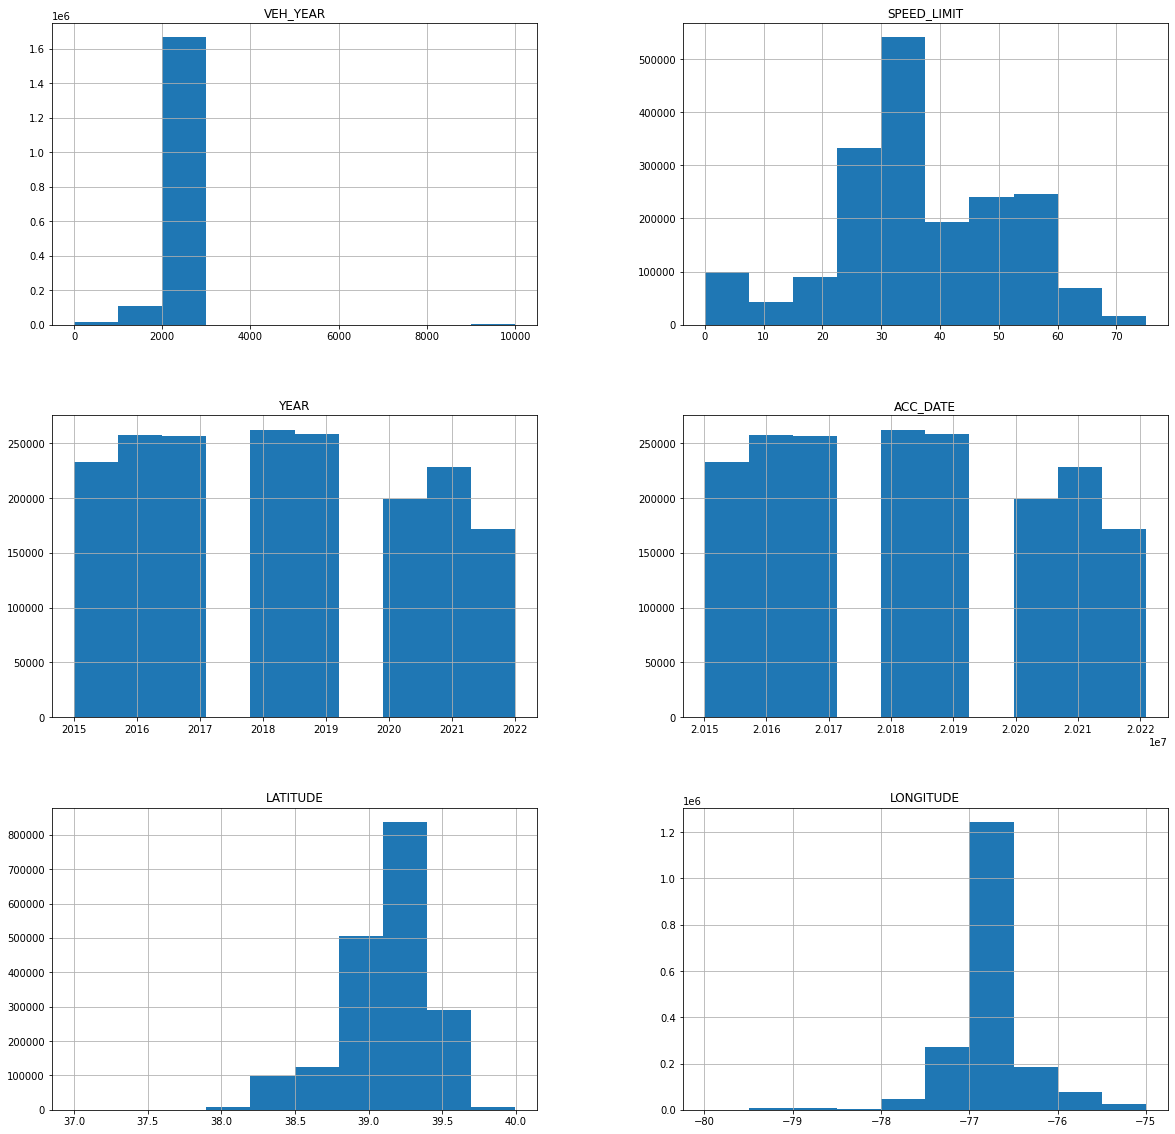

In [23]:
final_data.hist(figsize=(20,20))
plt.show()

In [24]:
final_data['DATE_OF_BIRTH']=pd.to_datetime(final_data['DATE_OF_BIRTH'], errors='coerce')
final_data['DOB_YEAR'] = final_data['DATE_OF_BIRTH'].dt.year

In [25]:
# Calculating the age of a person and storing it in a new variable (column)
final_data['AGE']=2023-final_data['DOB_YEAR']

In [26]:
#Storing accident date into correct format
final_data['accident_date']=pd.to_datetime(final_data['ACC_DATE'],format='%Y%m%d')

In [27]:
#Storing accident date time into correct format
final_data['accident_datetime']=pd.to_datetime(final_data['accident_date'].astype(str)+' '+final_data['ACC_TIME'].astype(str))

In [28]:
final_data.head()

,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,YEAR,Quarter,VEHICLE_ID,REPORT_NO,SEX_DESC,DATE_OF_BIRTH,INJ_SEVER_DESC,...,COUNTY_DESC,LATITUDE,LONGITUDE,SURF_COND_DESC,RD_COND_DESC,RD_DIV_DESC,DOB_YEAR,AGE,accident_date,accident_datetime
0,NaN,UNKNOWN,25,2020,Q2,47e2531d-8c69-470c-9198-502a46c7639e,AE5057004X,NaN,NaT,No Injury,...,Baltimore,39.245577,-76.702305,Dry,No Defects,"Two-way, Not Divided",NaN,NaN,2020-05-28,2020-05-28 11:40:00
1,2018.0,TOYOTA,55,2020,Q2,0dbd4a00-c7f2-4c34-b543-c2633fe0118f,MSP7221001P,Female,1969-10-01,No Injury,...,Prince George's,38.989139,-76.883444,Dry,No Defects,"Two-way, Divided, Positive Median Barrier",1969.0,54.0,2020-06-05,2020-06-05 12:22:00
2,2018.0,TOYOTA,55,2020,Q2,0dbd4a00-c7f2-4c34-b543-c2633fe0118f,MSP7221001P,Male,1957-03-20,No Injury,...,Prince George's,38.989139,-76.883444,Dry,No Defects,"Two-way, Divided, Positive Median Barrier",1957.0,66.0,2020-06-05,2020-06-05 12:22:00
3,2017.0,TOYOTA,55,2020,Q2,8aef1463-c627-4983-86b9-a03da367e602,MSP7221001P,Female,1965-10-05,No Injury,...,Prince George's,38.989139,-76.883444,Dry,No Defects,"Two-way, Divided, Positive Median Barrier",1965.0,58.0,2020-06-05,2020-06-05 12:22:00
4,2020.0,TOYOTA,55,2020,Q2,402b0d1a-99c4-46b8-bfc7-0e3b90fce6f8,MSP7221001P,Male,1986-07-15,Non-incapacitating Injury,...,Prince George's,38.989139,-76.883444,Dry,No Defects,"Two-way, Divided, Positive Median Barrier",1986.0,37.0,2020-06-05,2020-06-05 12:22:00


In [29]:
final_data.isna().sum()

VEH_YEAR              78672
VEH_MAKE                243
SPEED_LIMIT               0
YEAR                      0
Quarter                   0
VEHICLE_ID                0
REPORT_NO                 0
SEX_DESC             146694
DATE_OF_BIRTH        149995
INJ_SEVER_DESC            0
PERSON_TYPE_DESC          0
ACC_DATE                  0
ACC_TIME                  0
WEATHER_DESC         901335
COUNTY_DESC              21
LATITUDE                  0
LONGITUDE                 0
SURF_COND_DESC       132915
RD_COND_DESC         128645
RD_DIV_DESC          140060
DOB_YEAR             149995
AGE                  149995
accident_date             0
accident_datetime         0
dtype: int64

#### Drop Null values

In [30]:
final_data=final_data.dropna()

In [31]:
final_data.isna().sum()

VEH_YEAR             0
VEH_MAKE             0
SPEED_LIMIT          0
YEAR                 0
Quarter              0
VEHICLE_ID           0
REPORT_NO            0
SEX_DESC             0
DATE_OF_BIRTH        0
INJ_SEVER_DESC       0
PERSON_TYPE_DESC     0
ACC_DATE             0
ACC_TIME             0
WEATHER_DESC         0
COUNTY_DESC          0
LATITUDE             0
LONGITUDE            0
SURF_COND_DESC       0
RD_COND_DESC         0
RD_DIV_DESC          0
DOB_YEAR             0
AGE                  0
accident_date        0
accident_datetime    0
dtype: int64

#### Removing records where speed limit is 0

In [32]:
final_data=final_data[final_data['SPEED_LIMIT']>0]

#### Removing records where WEATHER_DESC is Not applicable, Unknown, Other, Null

In [33]:
final_data=final_data[(final_data.WEATHER_DESC != 'Not Applicable') \
                                  & (final_data.WEATHER_DESC != 'Unknown') \
                                  & (final_data.WEATHER_DESC != 'Other') \
                                  & (final_data.WEATHER_DESC != 'null')]

#### Removing records where RD_COND_DESC is Not applicable

In [34]:
final_data=final_data[(final_data.RD_COND_DESC != 'Not Applicable')]

#### Removing records where SURF_COND_DESC is Not applicable

In [35]:
final_data=final_data[(final_data.SURF_COND_DESC != 'Not Applicable')]

#### Checking AGE should be greater than 

In [36]:
final_data=final_data[(final_data.AGE > 0)]

#### Correlation map of different columns specified 

<AxesSubplot:>

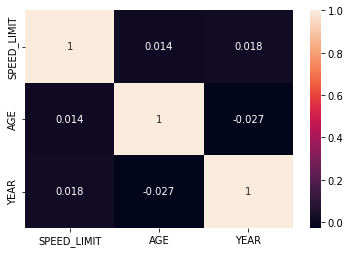

In [37]:
sns.heatmap(data=final_data[['SPEED_LIMIT','AGE','YEAR']].corr(), annot=True)

<Figure size 432x288 with 0 Axes>

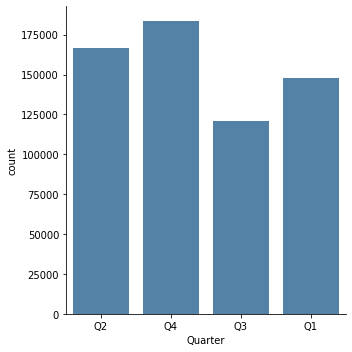

In [38]:
plt.figure()
fig1 = sns.catplot(data = final_data, x = 'Quarter', kind = 'count',color='steelblue')
plt.show()

[]

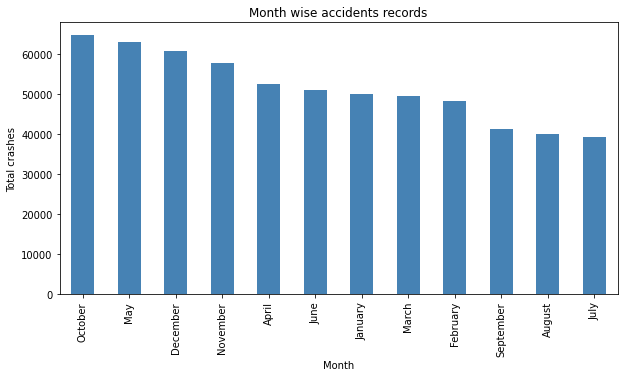

In [39]:
months=final_data['accident_datetime'].dt.month_name().value_counts()

ax = months.plot(kind='bar', figsize=(10,5),color='steelblue')
ax.set(xlabel='Month', ylabel='Total crashes', title='Month wise accidents records')
ax.plot()